# P4C2 - Augmentez la robustesse de vos modèles

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/blob/master/notebooks/P4C2_robustesse_modele.ipynb)

Dans ce notebook, nous allons rendre les modèles plus robustes gràce à 2 techniques

- la régularisation
- la validation croisée

Nous travaillons sur le dataset des arbres de Paris

Vous trouverez les versions suivantes du datasets

- sur le site [opendata de Paris](https://opendata.paris.fr/explore/dataset/les-arbres/information)
- version [brute](https://github.com/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/blob/master/data/paris-arbres-2023-09-07.csv) extraite le 10-09-2023, le séparateur est ';'
- version [exploitable](https://github.com/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/blob/master/data/paris-arbres-clean-2023-09-10.csv): les colonnes ont été renommées, le séparateur est ','
- version [numérisée](https://raw.githubusercontent.com/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/master/data/paris-arbres-numerical-2023-09-10.csv): les colonnes ont été renommées, le séparateur est ','

Ici nous travaillons sur cette version _numérisée_


# Compensez l'overfit avec la régularisation 

Pour montrer la regularisation avec Ridge il faudrait

- creer un dataset lineaire y = ax + bx^2 ou x est N(0,std) et  std est faible
- le modele qui overfit est ridge sans regularisation avec x, x^2, ... x^N. see from sklearn.preprocessing import PolynomialFeatures 
- puis demo, ajout regularisation permet de compenser l'overfit

voir

- https://www.kaggle.com/code/jonasschroeder/regularization-examples-ridge-lasso-l1-l2
- https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


In [2]:
random_state = 3
X, y = make_regression(n_samples=30, n_features=1, noise=40, random_state=random_state)
input = np.linspace(np.min(X), np.max(X), 100)


## Simple régression linéaire



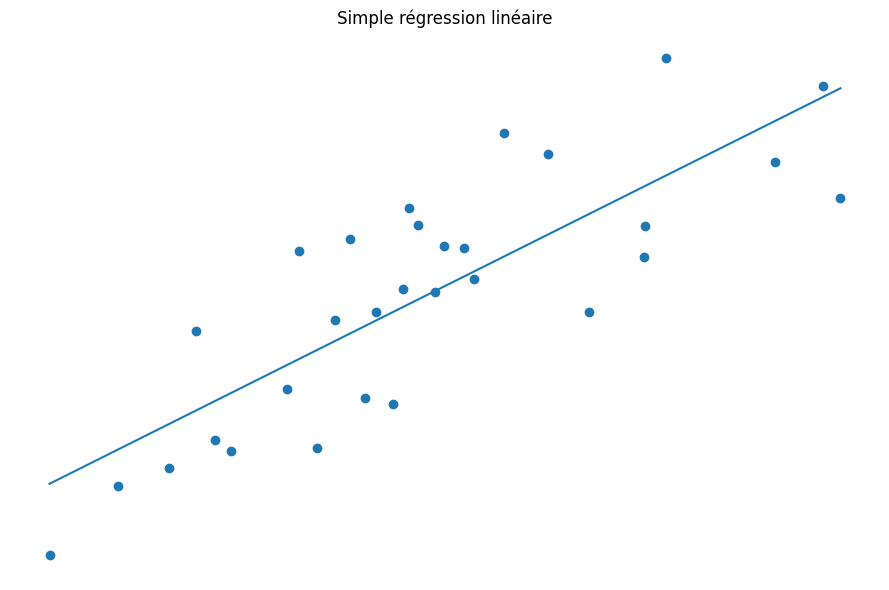

In [3]:
fig = plt.figure( figsize=(9, 6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X[:,0], y, label=f"Données source")
model = Ridge(alpha=0)
model.fit(X, y)

y_pred = model.predict(input.reshape(-1, 1))
ax.plot(input, y_pred, label=f"Simple régression linéaire")

ax.set_axis_off()
ax.set_title("Simple régression linéaire")
plt.tight_layout()
plt.show()


## Régression polynomiale de degré 12

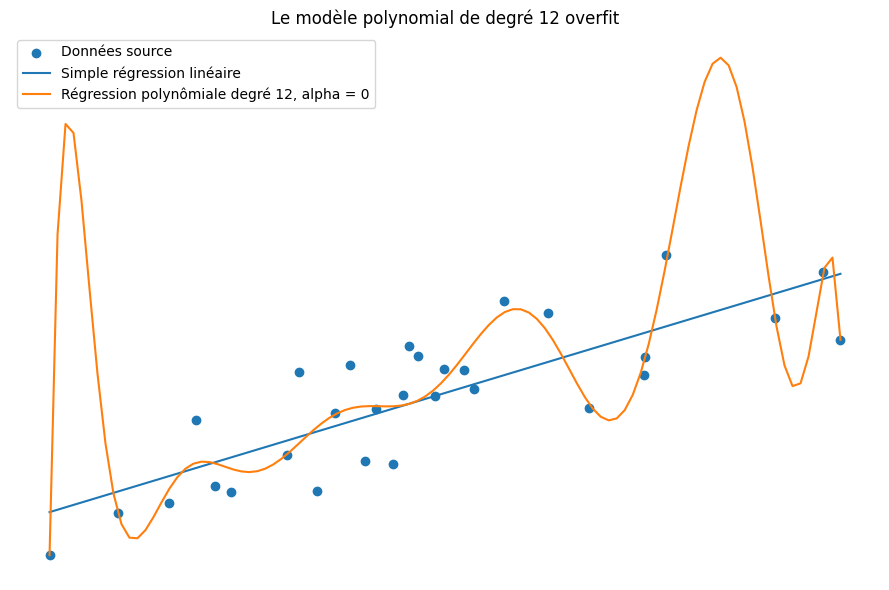

In [4]:
        fig = plt.figure( figsize=(9, 6))
        ax = fig.add_subplot(1, 1, 1)
        ax.scatter(X[:,0], y, label=f"Données source")
        model = Ridge(alpha=0)
        model.fit(X, y)

        y_pred = model.predict(input.reshape(-1, 1))
        ax.plot(input, y_pred, label=f"Simple régression linéaire")

        pol = PolynomialFeatures(12, include_bias = False)
        XX = pol.fit_transform(X)
        px = pol.transform(input.reshape(-1, 1))

        # sans regularisation
        model = Ridge(alpha=0)
        model.fit(XX, y)

        y_pred = model.predict(px)
        ax.plot(input, y_pred, label=f"Régression polynômiale degré 12, alpha = 0")

        ax.set_axis_off()
        ax.legend()
        ax.set_title("Le modèle polynomial de degré 12 overfit")
        plt.tight_layout()
        plt.show()


## La régularisation atténue l'overfitting

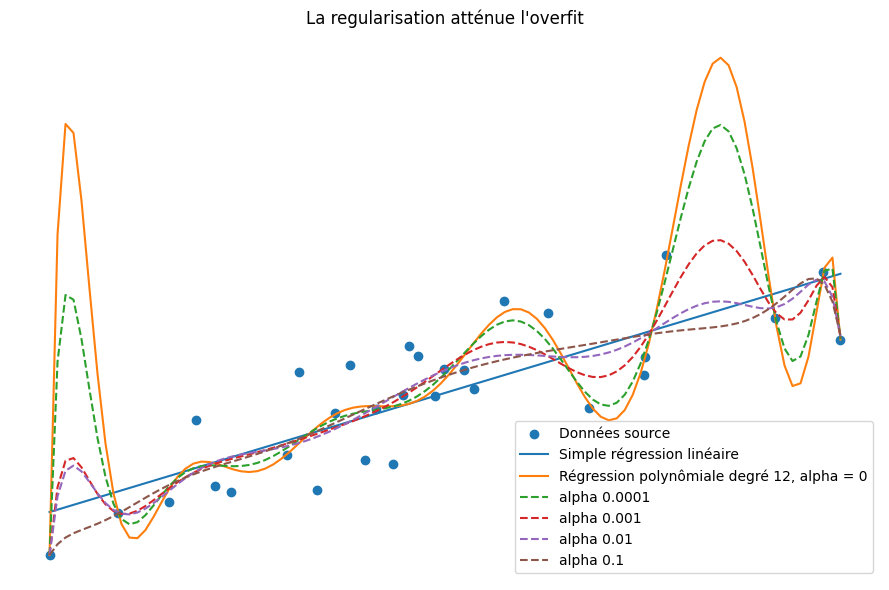

In [5]:
        fig = plt.figure( figsize=(9, 6))
        ax = fig.add_subplot(1, 1, 1)
        ax.scatter(X[:,0], y, label=f"Données source")
        model = Ridge(alpha=0)
        model.fit(X, y)

        y_pred = model.predict(input.reshape(-1, 1))
        ax.plot(input, y_pred, label=f"Simple régression linéaire")

        pol = PolynomialFeatures(12, include_bias = False)
        XX = pol.fit_transform(X)
        px = pol.transform(input.reshape(-1, 1))

        # sans regularisation
        model = Ridge(alpha=0)
        model.fit(XX, y)

        y_pred = model.predict(px)
        ax.plot(input, y_pred, label=f"Régression polynômiale degré 12, alpha = 0")

        for alpha in [0.0001, 0.001, 0.01, 0.1]:

            model = Ridge(alpha=alpha)
            model.fit(XX, y)
            y_pred = model.predict(px)
            ax.plot(input, y_pred, '--' ,label=f"alpha {alpha}")

        ax.set_axis_off()
        ax.legend()
        ax.set_title("La regularisation atténue l'overfit")
        plt.tight_layout()
        plt.show()

# Validation croisée

Retrouvons la valeur optimal de profondeur de l'arbre de classification pour le dataset des arbres de Paris

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 

Chargeons la version numérisée du dataset des arbres de Paris


In [7]:
filename = 'https://raw.githubusercontent.com/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/master/data/paris-arbres-numerical-2023-09-10.csv'
data = pd.read_csv(filename)

Précisons la matrice prédiction et la variable cible

In [16]:
X = data[['domanialite', 'arrondissement', 'libelle_francais', 'genre', 'espece', 'circonference_cm', 'hauteur_m']]
y = data.stade_de_developpement.values


Définissons l'espace des valeurs possibles du paramètre :

In [17]:
parameters = {'max_depth':np.arange(2, 30, 2)}

Cette fois, on ne précise pas le paramètre lorsque l'on instancie le modèle :


In [18]:
model = DecisionTreeClassifier(
    random_state = 808
)


Et on entraîne le modele en faisant une validation croisée a 5 plis (fold). 

Notez 

- on précise la fonction de score: roc_auc_ovr qui correspond à ROC_AUC
- on entraîne le modele sur tout le dataset et non pas sur un sous ensemble de train car la validation croisée se charge de gérer la séparation entraînement / test
- comme on a 14 valeurs potentielles du paramètre max_depth et que l'on fait une validation croisée à 5 plis , on doit donc entrainer 4 x 10 = 70 modèles!


In [21]:
clf = GridSearchCV(model, parameters, cv = 5, scoring = 'roc_auc_ovr', verbose = 1)
clf.fit(X, y)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=808),
             param_grid={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28])},
             scoring='roc_auc_ovr', verbose=1)

Les modèle sont entraînés. L'object clf permet de voir directement

- la meilleur valeur des paramètres :





In [22]:
clf.best_params_

{'max_depth': 10}

- le meilleur score obtenu :

In [24]:
clf.best_score_

0.9364145767567329

- le meilleur modèle

In [25]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=10, random_state=808)

In [27]:
# on peut aussi explorer
clf.cv_results_


{'mean_fit_time': array([0.06371422, 0.1126132 , 0.14131951, 0.16995554, 0.20081444,
        0.25202723, 0.33586717, 0.31581016, 0.32773871, 0.33421397,
        0.31677194, 0.33182597, 0.34550033, 0.34563999]),
 'std_fit_time': array([0.00365941, 0.00347446, 0.01226553, 0.0072153 , 0.00445471,
        0.01674547, 0.06560224, 0.02322927, 0.01971592, 0.04198433,
        0.01074217, 0.02394008, 0.01830793, 0.01334584]),
 'mean_score_time': array([0.03069119, 0.03677216, 0.03376298, 0.03162456, 0.03372011,
        0.03867245, 0.03670783, 0.03693805, 0.03726859, 0.03377457,
        0.03438239, 0.0355391 , 0.03405113, 0.03397975]),
 'std_score_time': array([0.00202755, 0.00128958, 0.00257933, 0.00270514, 0.00293897,
        0.00404684, 0.00096456, 0.00318481, 0.00352686, 0.00461386,
        0.0026397 , 0.00404252, 0.00352958, 0.00470185]),
 'param_max_depth': masked_array(data=[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28],
              mask=[False, False, False, False, False, False, 